<a href="https://colab.research.google.com/github/kiiriis/CE063_ML/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
from sklearn.datasets import make_blobs
import numpy as np

X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)

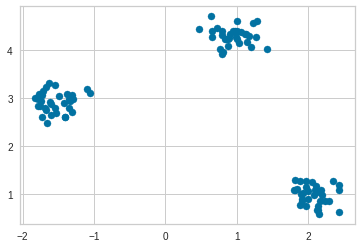

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 0.95164831,  4.28882085],
       [ 2.0720792 ,  0.98848385],
       [-1.538563  ,  2.91165191]])

In [ ]:
# Get the cluster labels
kmeans.labels_

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

In [ ]:
y_kmeans = kmeans.predict(X)

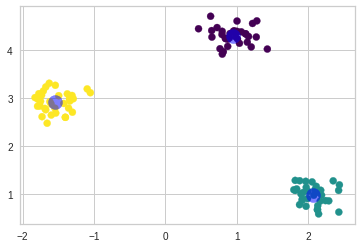

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

silhouette_score_average = silhouette_score(X, y_kmeans)
print(silhouette_score_average)

0.8816040239688525


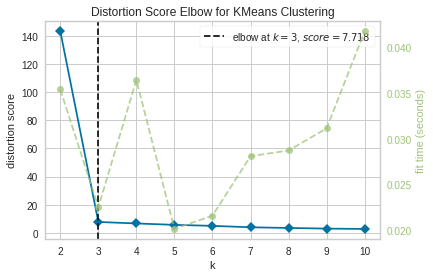

In [ ]:
#  KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elb_visualizer = KElbowVisualizer(kmeans, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()  

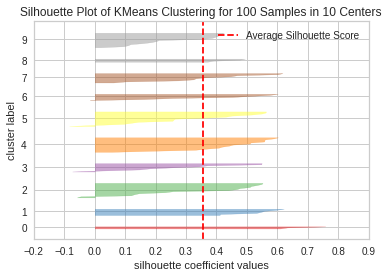

In [ ]:
# SilhouetteVisualizer
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X)    
sil_visualizer.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([0], dtype=int32)

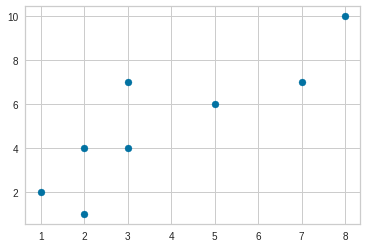

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[1,2],[2,1],[3,4],[8,10],[3,7],[5,6], [2, 4], [7, 7]])
#X1.shape()
# X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[1,2],[2,1],[8,10]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[2,4]])

# Hand Written Digit Recognition

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits() #load the dataset in digits

In [ ]:
#Dataset loaded is a dictionary
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
# data : flattened arrays/tensors used for clustering
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
# target : label associated with flattened array
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
#run KMeans clustering on digits.data for 1797 records and 64 features

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

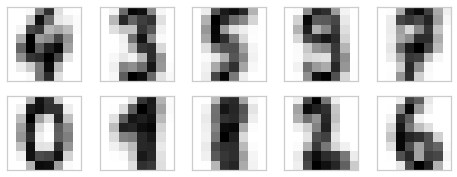

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)

centers = kmeans.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8 matrix

for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image & plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) #imshow(matplotlib method) to render the image in notebook

In [ ]:
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)
  #if a specific digit belongs to/equivalent a specific cluster then its True else False
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

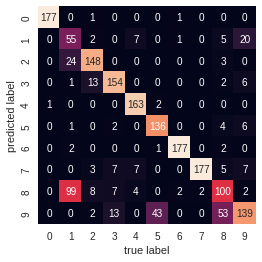

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9432387312186978